In [63]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
#sns.set(style="darkgrid")
#sns.set(style="whitegrid")
#sns.set_style("white")
sns.set(style="whitegrid",font_scale=2)
import matplotlib.collections as clt
#!pip install ptitprince
import ptitprince as pt

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def savefigs(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [64]:
# Datos Vacunación COVID Europa
# https://www.ecdc.europa.eu/en/publications-data/data-covid-19-vaccination-eu-eea

df = pd.read_csv ("dataEuropa.csv", sep= ";")
df.head()

,YearWeekISO,ReportingCountry,Denominator,NumberDosesReceived,NumberDosesExported,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,UnknownDose,Region,TargetGroup,Vaccine,Population
0,2020-W53,AT,8901064.0,61425.0,0.0,5178,NaN,0,0,0,AT,ALL,COM,8901064
1,2020-W53,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,MOD,8901064
2,2020-W53,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,UNK,8901064
3,2020-W53,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,JANSS,8901064
4,2020-W53,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,AZ,8901064


In [65]:
#Total de dosis recibidas por país
Vacunas = df.groupby(['ReportingCountry'])['NumberDosesReceived'].sum()
Vacunas


ReportingCountry
AT    227789916.0
BE     19783595.0
BG      7655110.0
CY      1730107.0
CZ     18200960.0
DE    138654380.0
DK      9210270.0
EE      1916700.0
EL    293145480.0
ES     92909609.0
FI      9471085.0
FR    124236510.0
HR      5230910.0
HU     26262346.0
IE      9207160.0
IS     10092640.0
IT    100181246.0
LI        55860.0
LT      7237860.0
LU      1053450.0
LV      2938225.0
MT            0.0
NL     34116940.0
NO     10518335.0
PL     78796960.0
PT     23017910.0
RO     20146265.0
SE     19150635.0
SI      3836880.0
SK      6154480.0
Name: NumberDosesReceived, dtype: float64

Text(0.5, 1.0, 'Dosis de vacunas aplicadas por país en Europa')

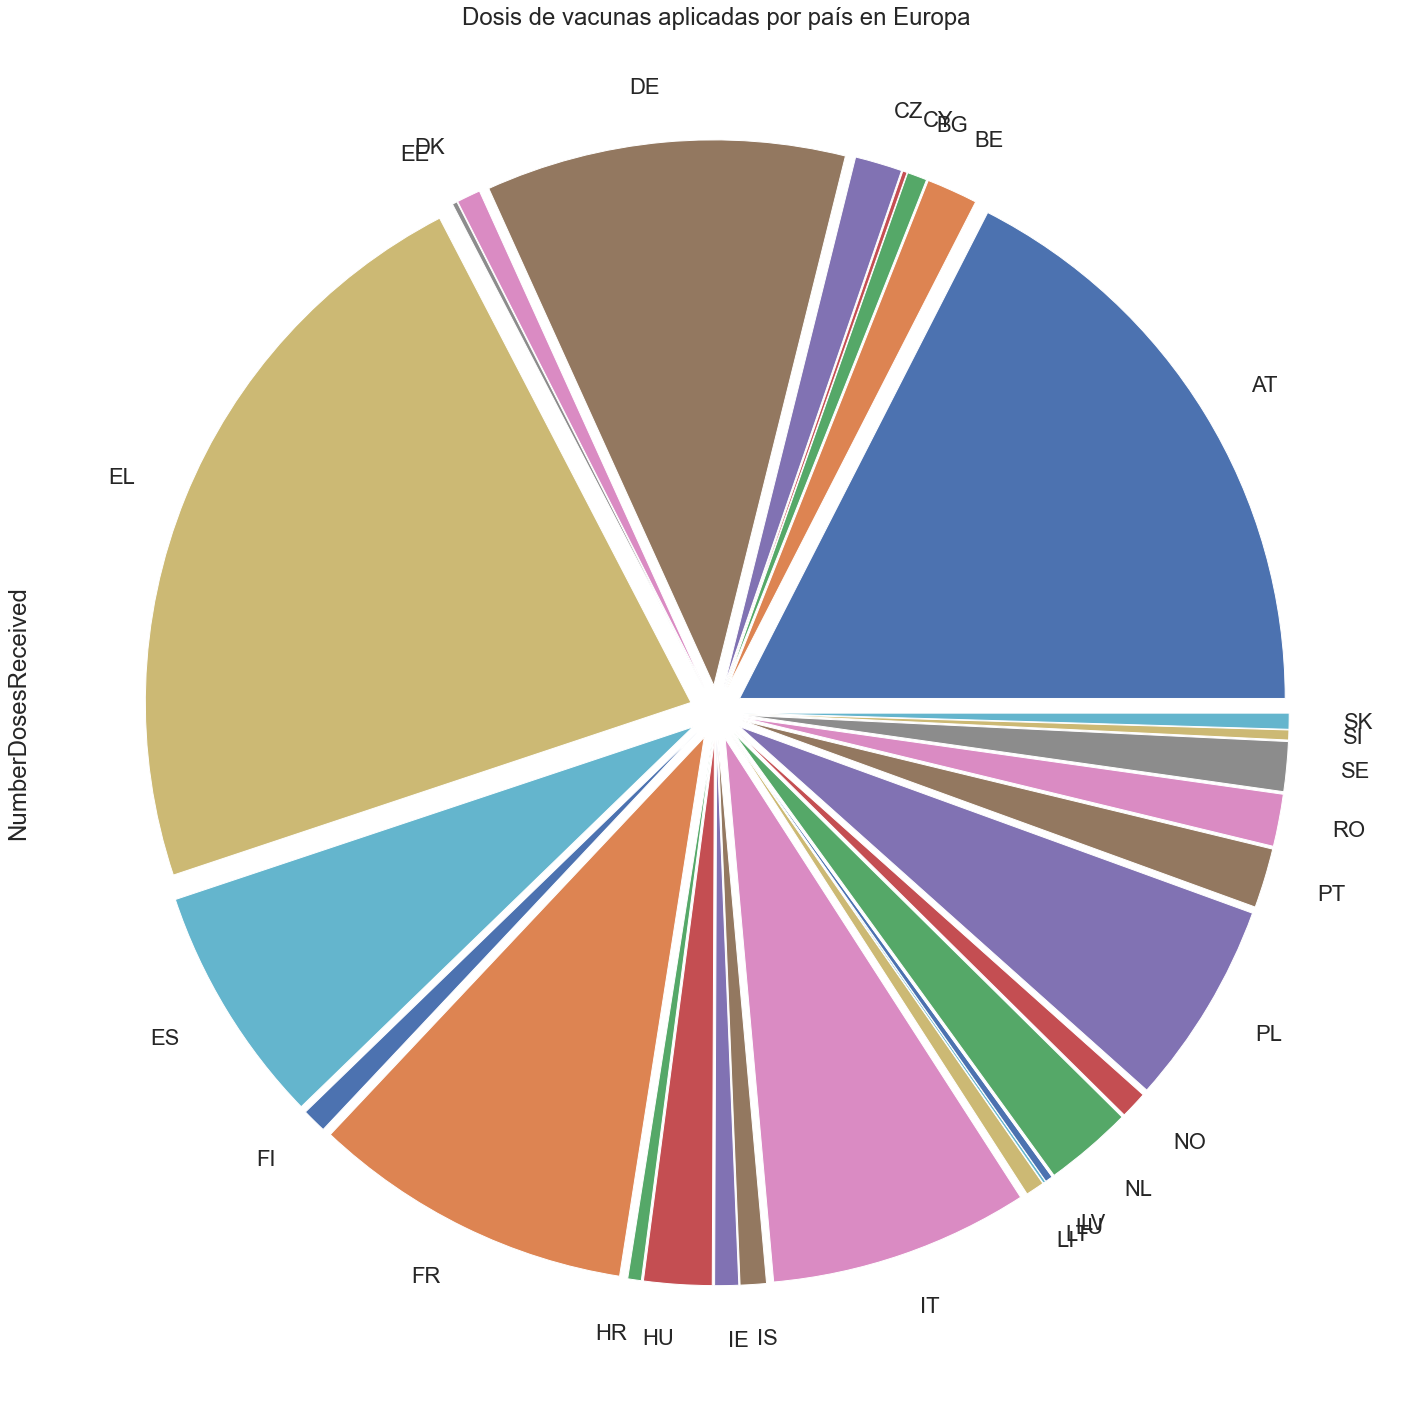

In [66]:
separacion = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]

Vacunas.plot.pie(figsize=(20,20),wedgeprops={'linewidth':1}, explode=separacion)
plt.title("Dosis de vacunas aplicadas por país en Europa")




In [67]:
#Total de dosis recibidas por país
VacunasTop5 = Vacunas.sort_values(ascending=False)
VacunasTop5 = VacunasTop5.head(5)
VacunasTop5

ReportingCountry
EL    293145480.0
AT    227789916.0
DE    138654380.0
FR    124236510.0
IT    100181246.0
Name: NumberDosesReceived, dtype: float64

In [68]:
Diferencia = Vacunas.sum() - VacunasTop5.sum()
Diferencia

#Agregar Valor para resto de países a df
fila = pd.Series(Diferencia)

dfDif = pd.concat([fila, VacunasTop5], ignore_index=True)


In [73]:
#Pie chart Top 5
import plotly.express as px
labels = ['Resto de Países','Grecia','Austria','Alemania','Francia','Italia']
values = dfDif
fig1 = px.pie(labels, values = values, names = labels)
fig1.update_traces(title = 'Top 5 Países con Dosis de Vacunas - Europa',
                   title_font = dict(size=25,family='Verdana', 
                                     color='darkred'),
                   hoverinfo='label+percent',
                   textinfo='percent', textfont_size=20)
fig1.update_layout(margin=dict(t=0, b=0, l=0, r=0))
fig1.show()

#Publicar en plotly
username = 'edobejar' # your username
api_key = 'OQpM6eKhTTYe9JhkdQ5F' # your api key - go to profile > settings > regenerate key

#import chart_studio
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)
py.plot(fig1, filename = 'top5_vacunas', auto_open=True)

#import plotly.io as pio
#pio.write_html(fig1, file='index.html', auto_open=True)

'https://plotly.com/~edobejar/1/'

In [74]:
# Referencia Raincloud Plots 
# https://towardsdatascience.com/making-it-rain-with-raincloud-plots-496c39a2756f
# Datos: Casos Diarios COVID-19
# https://www.ecdc.europa.eu/en/publications-data/data-daily-new-cases-covid-19-eueea-country

Casos = pd.read_csv ("dataCasos.csv", sep= ";")
Casos.head()

,dateRep,year,month,day,cases,deaths,countriesAndTerritories,geoId,popData2020,countryterritoryCode,continentExp
0,16/11/2021,2021,11,16,12199,29,Austria,AT,8901064,AUT,Europe
1,15/11/2021,2021,11,15,11227,36,Austria,AT,8901064,AUT,Europe
2,14/11/2021,2021,11,14,13284,26,Austria,AT,8901064,AUT,Europe
3,13/11/2021,2021,11,13,11191,31,Austria,AT,8901064,AUT,Europe
4,12/11/2021,2021,11,12,13500,27,Austria,AT,8901064,AUT,Europe


In [75]:
#subgrupo con Casos y Territorios
CasosPais = Casos[["countriesAndTerritories","cases"]]
CasosPais.head()




,countriesAndTerritories,cases
0,Austria,12199
1,Austria,11227
2,Austria,13284
3,Austria,11191
4,Austria,13500


In [76]:
soloES = Casos[(Casos['countriesAndTerritories'] == "Spain") | (Casos['countriesAndTerritories'] == "Portugal" )]
soloES.head()






,dateRep,year,month,day,cases,deaths,countriesAndTerritories,geoId,popData2020,countryterritoryCode,continentExp
6264,16/11/2021,2021,11,16,974,8,Portugal,PT,10295909,PRT,Europe
6265,15/11/2021,2021,11,15,1483,15,Portugal,PT,10295909,PRT,Europe
6266,14/11/2021,2021,11,14,1816,8,Portugal,PT,10295909,PRT,Europe
6267,13/11/2021,2021,11,13,1751,3,Portugal,PT,10295909,PRT,Europe
6268,12/11/2021,2021,11,12,1477,9,Portugal,PT,10295909,PRT,Europe


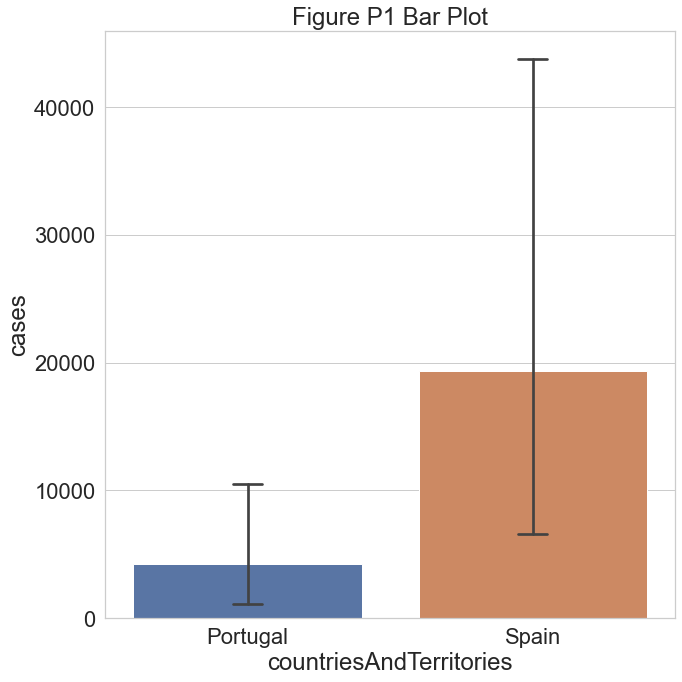

In [77]:
sns.barplot(x = "countriesAndTerritories", y = "cases", data = soloES, capsize= .1)
plt.title("Figure P1 Bar Plot")
if savefigs:
    plt.savefig('figureP01.png', bbox_inches='tight')


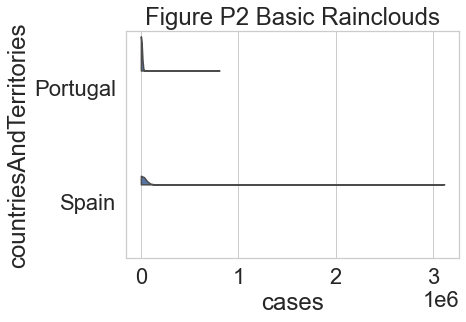

In [78]:
# plotting the clouds
f, ax = plt.subplots(figsize=(7, 5))
dy="countriesAndTerritories"; dx="cases"; ort="h"; pal = sns.color_palette(n_colors=1)
ax=pt.half_violinplot( x = dx, y = dy, data = soloES, palette = pal, bw = .2, cut = 0.,
                      scale = "area", width = .6, inner = None, orient = ort)
plt.title("Figure P2 Basic Rainclouds")
if savefigs:
    plt.savefig('figureP02.png', bbox_inches='tight')

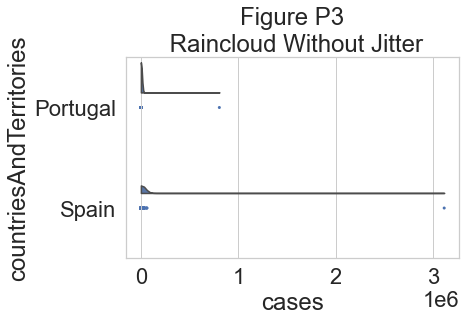

In [79]:
# adding the rain
f, ax = plt.subplots(figsize=(7, 5))
ax=pt.half_violinplot( x = dx, y = dy, data = soloES, palette = pal, bw = .2, cut = 0.,
scale = "area", width = .6, inner = None, orient = ort)
ax=sns.stripplot( x = dx, y = dy, data = soloES, palette = pal, edgecolor = "white",
size = 3, jitter = 0, zorder = 0, orient = ort)
plt.title("Figure P3\n Raincloud Without Jitter")
if savefigs:
    plt.savefig('figureP03.png', bbox_inches='tight')

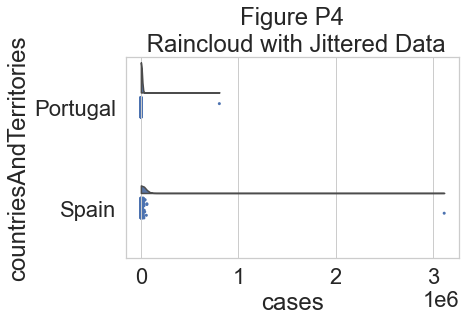

In [80]:
# adding jitter to the rain
f, ax = plt.subplots(figsize=(7, 5))
ax=pt.half_violinplot( x = dx, y = dy, data = soloES, palette = pal, bw = .2, cut = 0.,
scale = "area", width = .6, inner = None, orient = ort)
ax=sns.stripplot( x = dx, y = dy, data = soloES, palette = pal, edgecolor = "white",
size = 3, jitter = 1, zorder = 0, orient = ort)
plt.title("Figure P4\n Raincloud with Jittered Data")
if savefigs:
    plt.savefig('figureP04.png', bbox_inches='tight')

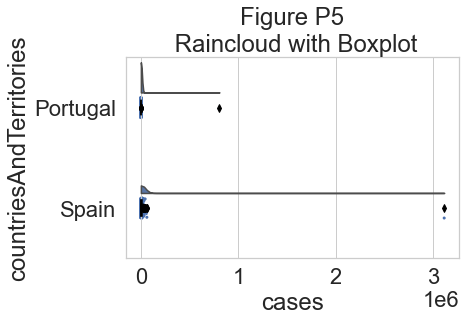

In [81]:
#adding the boxplot with quartiles
f, ax = plt.subplots(figsize=(7, 5))
ax=pt.half_violinplot( x = dx, y = dy, data = soloES, palette = pal, bw = .2, cut = 0.,
scale = "area", width = .6, inner = None, orient = ort)
ax=sns.stripplot( x = dx, y = dy, data = soloES, palette = pal, edgecolor = "white",
size = 3, jitter = 1, zorder = 0, orient = ort)
ax=sns.boxplot( x = dx, y = dy, data = soloES, color = "black", width = .15, zorder = 10,\
showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
saturation = 1, orient = ort)
plt.title("Figure P5\n Raincloud with Boxplot")
if savefigs:
    plt.savefig('figureP05.png', bbox_inches='tight')

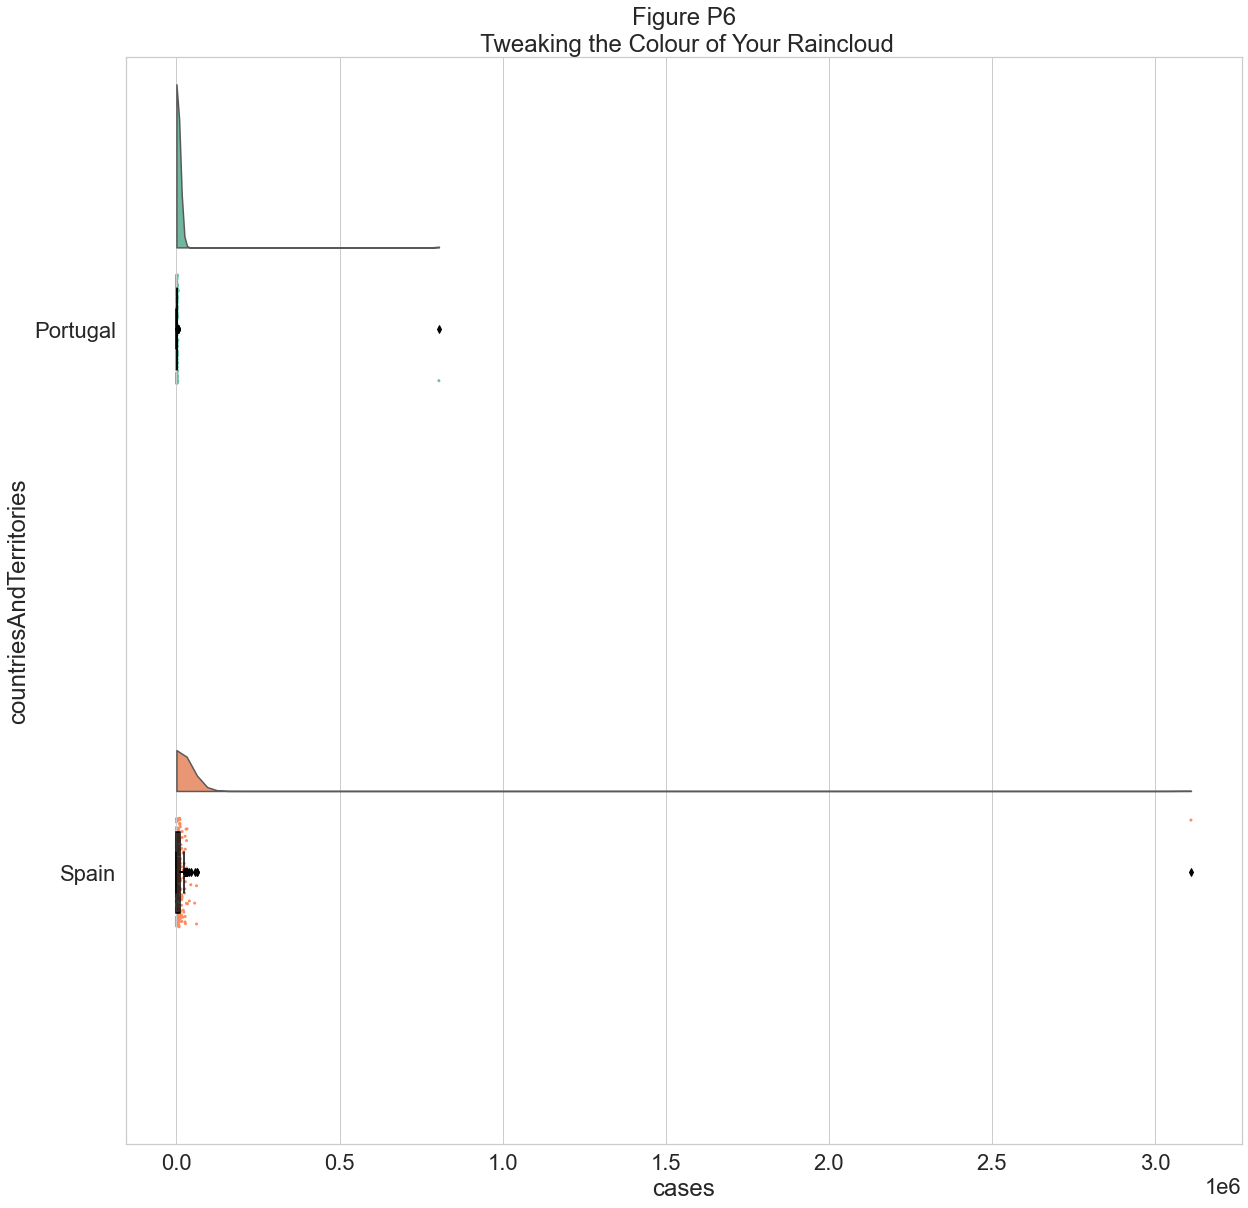

In [26]:
#adding color
pal = "Set2"
f, ax = plt.subplots(figsize=(20, 20))
ax=pt.half_violinplot( x = dx, y = dy, data = soloES, palette = pal, bw = .2, cut = 0.,
scale = "area", width = .6, inner = None, orient = ort)
ax=sns.stripplot( x = dx, y = dy, data = soloES, palette = pal, edgecolor = "white",
size = 3, jitter = 1, zorder = 0, orient = ort)
ax=sns.boxplot( x = dx, y = dy, data = soloES, color = "black", width = .15, zorder = 10,\
showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
saturation = 1, orient = ort)
plt.title("Figure P6\n Tweaking the Colour of Your Raincloud")
if savefigs:
    plt.savefig('figureP06.png', bbox_inches='tight')

In [82]:
#Sin Outliers
SinOutliers = soloES[(soloES['cases'] < 800000)]
SinOutliers.head()


,dateRep,year,month,day,cases,deaths,countriesAndTerritories,geoId,popData2020,countryterritoryCode,continentExp
6264,16/11/2021,2021,11,16,974,8,Portugal,PT,10295909,PRT,Europe
6265,15/11/2021,2021,11,15,1483,15,Portugal,PT,10295909,PRT,Europe
6266,14/11/2021,2021,11,14,1816,8,Portugal,PT,10295909,PRT,Europe
6267,13/11/2021,2021,11,13,1751,3,Portugal,PT,10295909,PRT,Europe
6268,12/11/2021,2021,11,12,1477,9,Portugal,PT,10295909,PRT,Europe


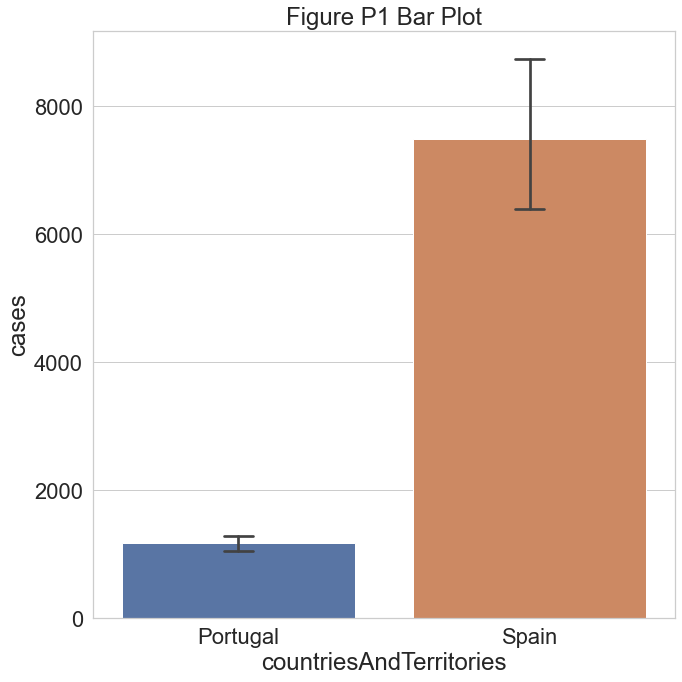

In [83]:
sns.barplot(x = "countriesAndTerritories", y = "cases", data = SinOutliers, capsize= .1)
plt.title("Figure P1 Bar Plot")
if savefigs:
    plt.savefig('figureP07.png', bbox_inches='tight')


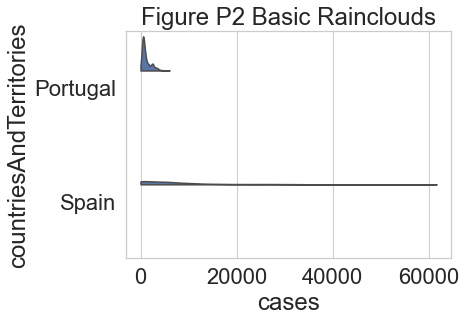

In [84]:
# plotting the clouds
f, ax = plt.subplots(figsize=(7, 5))
dy="countriesAndTerritories"; dx="cases"; ort="h"; pal = sns.color_palette(n_colors=1)
ax=pt.half_violinplot( x = dx, y = dy, data = SinOutliers, palette = pal, bw = .2, cut = 0.,
                      scale = "area", width = .6, inner = None, orient = ort)
plt.title("Figure P2 Basic Rainclouds")
if savefigs:
    plt.savefig('figureP08.png', bbox_inches='tight')

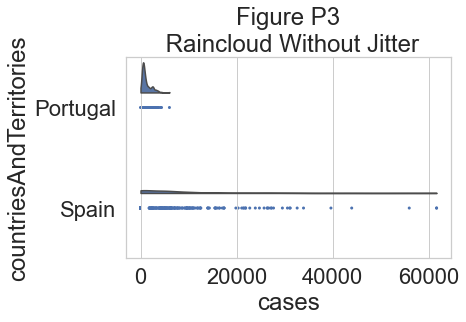

In [85]:
# adding the rain
f, ax = plt.subplots(figsize=(7, 5))
ax=pt.half_violinplot( x = dx, y = dy, data = SinOutliers, palette = pal, bw = .2, cut = 0.,
scale = "area", width = .6, inner = None, orient = ort)
ax=sns.stripplot( x = dx, y = dy, data = SinOutliers, palette = pal, edgecolor = "white",
size = 3, jitter = 0, zorder = 0, orient = ort)
plt.title("Figure P3\n Raincloud Without Jitter")
if savefigs:
    plt.savefig('figureP09.png', bbox_inches='tight')

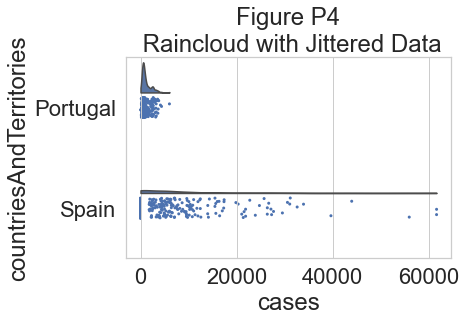

In [86]:
# adding jitter to the rain
f, ax = plt.subplots(figsize=(7, 5))
ax=pt.half_violinplot( x = dx, y = dy, data = SinOutliers, palette = pal, bw = .2, cut = 0.,
scale = "area", width = .6, inner = None, orient = ort)
ax=sns.stripplot( x = dx, y = dy, data = SinOutliers, palette = pal, edgecolor = "white",
size = 3, jitter = 1, zorder = 0, orient = ort)
plt.title("Figure P4\n Raincloud with Jittered Data")
if savefigs:
    plt.savefig('figureP04.png', bbox_inches='tight')

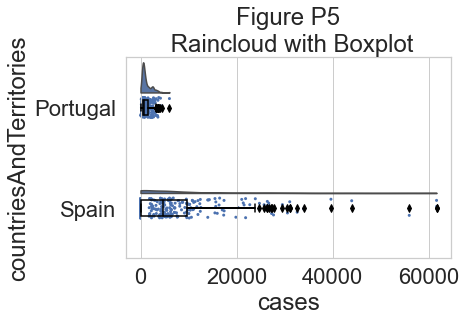

In [87]:
#adding the boxplot with quartiles
f, ax = plt.subplots(figsize=(7, 5))
ax=pt.half_violinplot( x = dx, y = dy, data = SinOutliers, palette = pal, bw = .2, cut = 0.,
scale = "area", width = .6, inner = None, orient = ort)
ax=sns.stripplot( x = dx, y = dy, data = SinOutliers, palette = pal, edgecolor = "white",
size = 3, jitter = 1, zorder = 0, orient = ort)
ax=sns.boxplot( x = dx, y = dy, data = SinOutliers, color = "black", width = .15, zorder = 10,\
showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
saturation = 1, orient = ort)
plt.title("Figure P5\n Raincloud with Boxplot")
if savefigs:
    plt.savefig('figureP05.png', bbox_inches='tight')

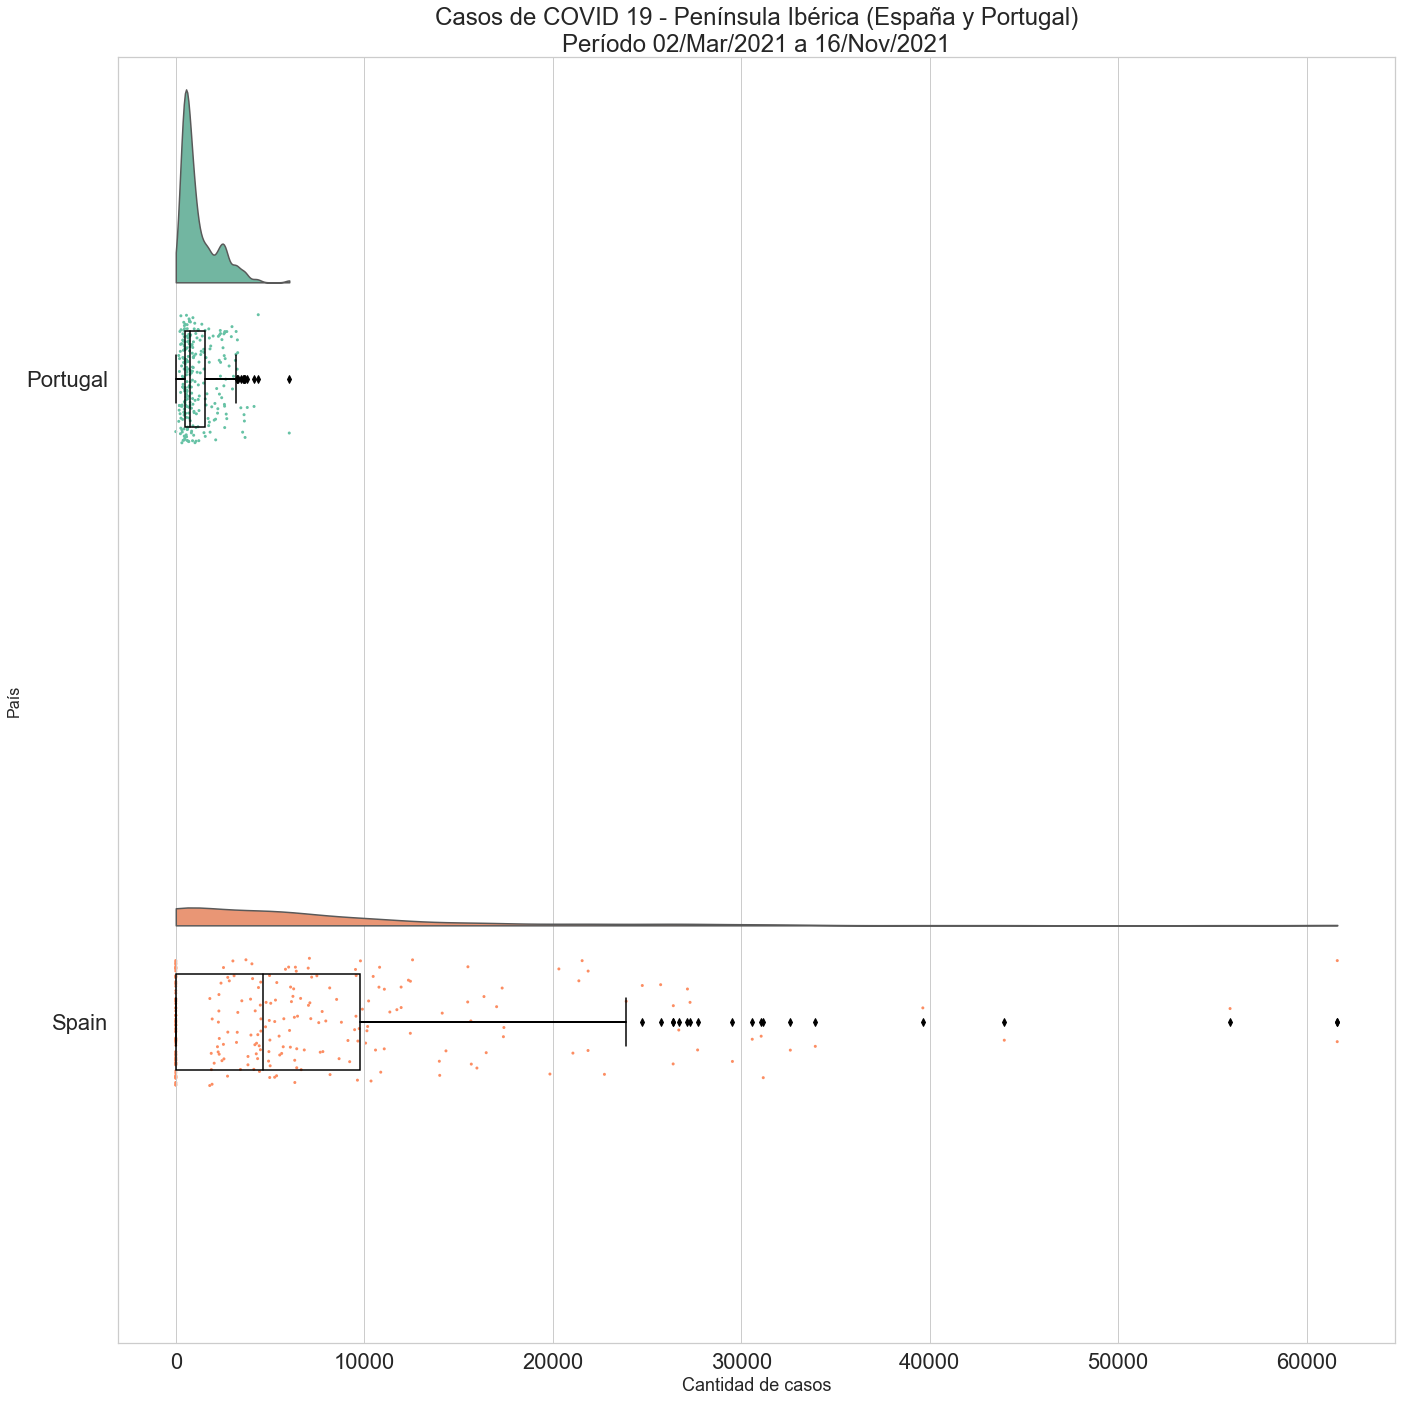

In [88]:
#adding color
pal = "Set2"
f, ax = plt.subplots(figsize=(20, 20))
ax=pt.half_violinplot( x = dx, y = dy, data = SinOutliers, palette = pal, bw = .2, cut = 0.,
scale = "area", width = .6, inner = None, orient = ort)
ax=sns.stripplot( x = dx, y = dy, data = SinOutliers, palette = pal, edgecolor = "white",
size = 3, jitter = 1, zorder = 0, orient = ort)
ax=sns.boxplot( x = dx, y = dy, data = SinOutliers, color = "black", width = .15, zorder = 10,\
showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
saturation = 1, orient = ort)
plt.title("Casos de COVID 19 - Península Ibérica (España y Portugal)\nPeríodo 02/Mar/2021 a 16/Nov/2021")
plt.xlabel('Cantidad de casos', fontsize=18)
plt.ylabel('País', fontsize=16)

if savefigs:
    plt.savefig('figureP06.png', bbox_inches='tight')

In [36]:
#!pip install matplotlib-venn

In [89]:
#Vacunas por tipo
datosVacunas = pd.read_csv ("dataEuropa.csv", sep= ";")
datosVacunas.head()


,YearWeekISO,ReportingCountry,Denominator,NumberDosesReceived,NumberDosesExported,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,UnknownDose,Region,TargetGroup,Vaccine,Population
0,2020-W53,AT,8901064.0,61425.0,0.0,5178,NaN,0,0,0,AT,ALL,COM,8901064
1,2020-W53,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,MOD,8901064
2,2020-W53,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,UNK,8901064
3,2020-W53,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,JANSS,8901064
4,2020-W53,AT,8901064.0,0.0,0.0,0,NaN,0,0,0,AT,ALL,AZ,8901064


In [90]:
#subgrupo con Marca de Vacuna y País
MarcaPais = datosVacunas[["ReportingCountry","Vaccine"]]
MarcaPais.head()


,ReportingCountry,Vaccine
0,AT,COM
1,AT,MOD
2,AT,UNK
3,AT,JANSS
4,AT,AZ


In [91]:
#Solo España y Hungría por tipo de vacuna

Solo_ES = MarcaPais[(MarcaPais['ReportingCountry'] == "ES")].apply(MarcaPais.value_counts).fillna(0)
#soloESHU.head()

Solo_ES

,ReportingCountry,Vaccine
AZ,0.0,690.0
COM,0.0,690.0
ES,2760.0,0.0
JANSS,0.0,690.0
MOD,0.0,690.0


In [92]:
Solo_HU = MarcaPais[(MarcaPais['ReportingCountry'] == "HU")].apply(MarcaPais.value_counts).fillna(0)
Solo_HU

,ReportingCountry,Vaccine
AZ,0.0,437.0
BECNBG,0.0,417.0
COM,0.0,497.0
HU,2592.0,0.0
JANSS,0.0,337.0
MOD,0.0,467.0
SPU,0.0,437.0


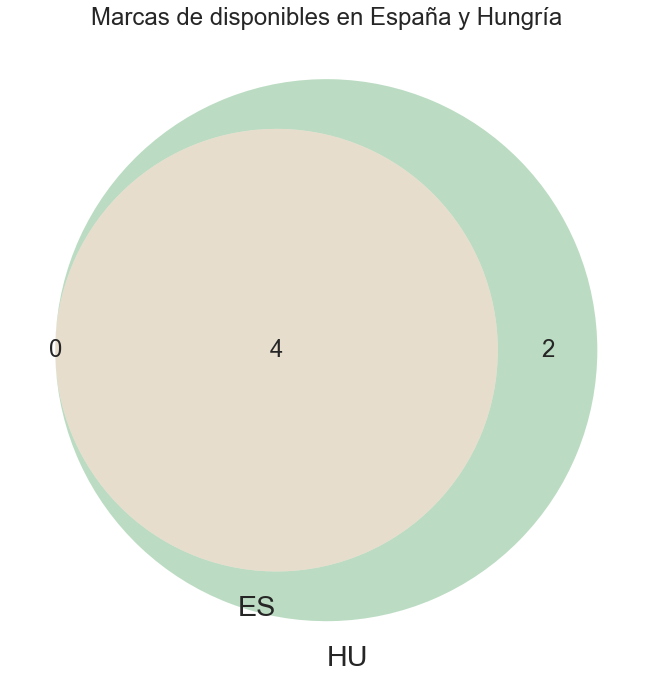

In [96]:
from matplotlib import pyplot as plt2
from matplotlib_venn import venn2

plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True

set1 = {'AZ', 'COM', 'JANSS', 'MOD'}
set2 = {'AZ', 'COM', 'JANSS', 'BECNBG', 'SPU','MOD'}


out = venn2([set1, set2], ('ES', 'HU'))

plt.title("Marcas de disponibles en España y Hungría")
plt.show()

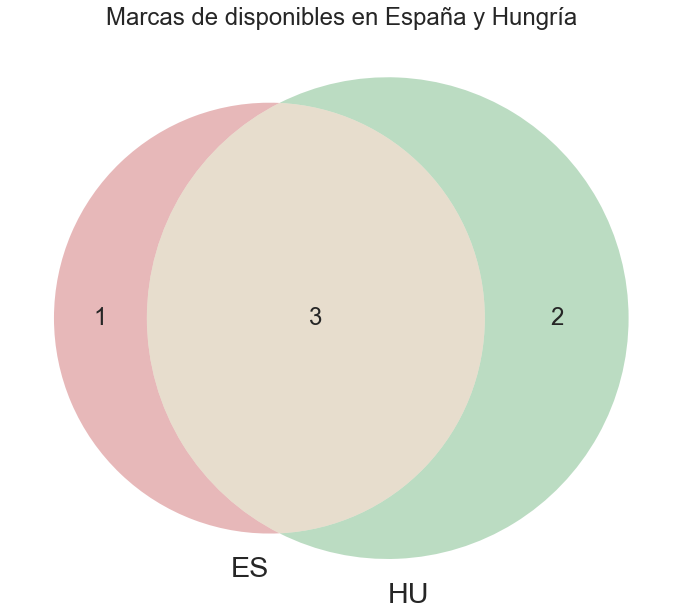

<Figure size 720x720 with 0 Axes>

In [99]:
from matplotlib import pyplot as plt2
from matplotlib_venn import venn2

plt2.rcParams["figure.figsize"] = [10, 10]
plt2.rcParams["figure.autolayout"] = True

set1 = {'AZ', 'COM', 'JANSS', 'MOD'}
set2 = {'AZ', 'COM', 'BECNBG', 'SPU','MOD'}


out = venn2([set1, set2], ('ES', 'HU'))

plt2.title("Marcas de disponibles en España y Hungría")
plt2.show()

if savefigs:
    plt2.savefig('figureP12.png', bbox_inches='tight')